## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

In [ ]:
# 1
# What is the difference between regression and classification?
'''
Regression is predicting a continuous value. Classification is predicting a discrete category/class. (Regression is for numerics and classification is for categoricals)
'''

# 2
# What is a confusion table? What does it help us understand about a model's performance?
'''
A confusion table is a table showing True Positives, True Negatives, False Positives, and False Negatives.  It helps understand where a model is making mistakes,
with more depth beyond how often it is correct.
'''

# 3
# What does the SSE quantify about a particular model?
'''
SSE (summed squared error) quantifies how well a regression model fits the data.
'''

# 4
# What are overfitting and underfitting?
'''
Overfitting occurs when a model is too complex.  Underfitting occurs when a model is too simple.
'''

# 5
# Why does splitting the data into training and testing sets, and choosing k by evaluating accuracy or SSE on the test set, improve model performance?
'''
Splitting the data allows for the model to be trained, then see how the model performs on unknown data.
Choosing k by evaluating accuracy or SSE on the test set helps prevent overfitting to the training set.
'''

# 6
# With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
'''
Report a class as a prediction:
Strengths - Helpful when only one outcome is relevant
Weaknesses - Does not distinguish between confiendence and uncertainty
Report a probability distribution over class labels:
Strengths - Accounts for uncertainty
Weaknesses - Sometimes excessively complex
'''

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654
...,...,...,...
2494,7800,2019,23609
2495,9200,2018,34553
2496,9200,2018,31594
2497,9200,2018,32557


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537
...,...,...,...
2494,7800,0.978723,0.023193
2495,9200,0.957447,0.033944
2496,9200,0.957447,0.031037
2497,9200,0.957447,0.031983


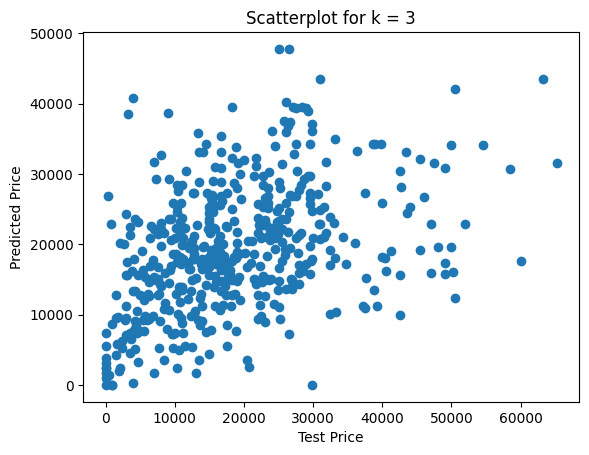

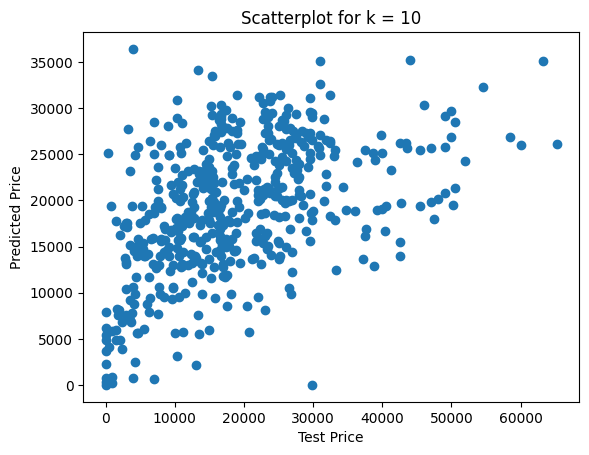

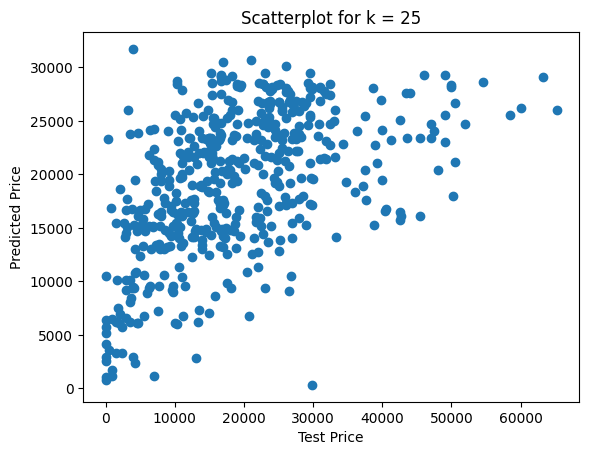

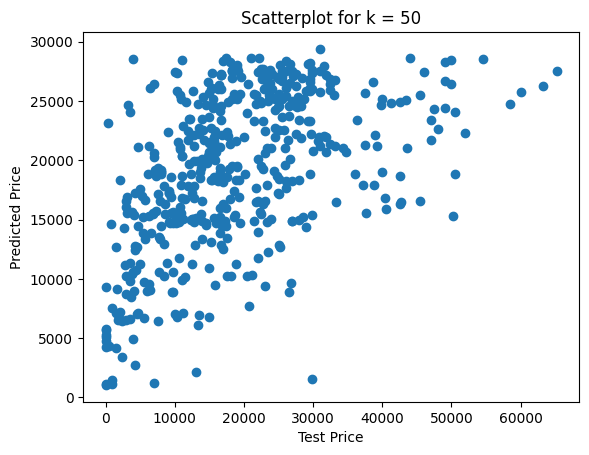

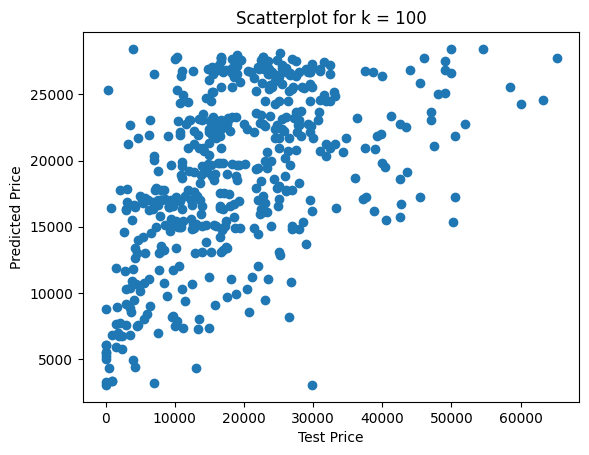

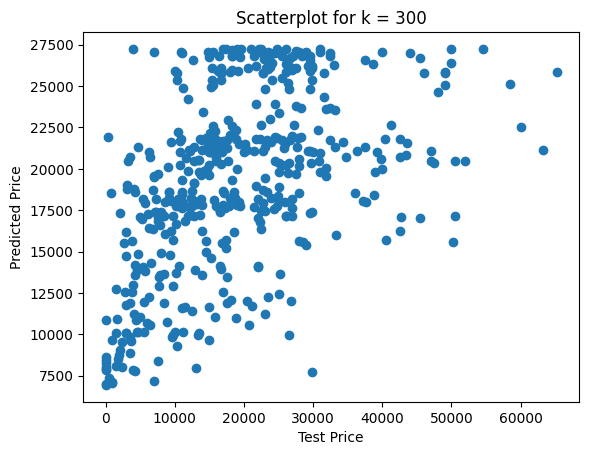

The optimal k value is: 50
The minimum SSE on the test set is: 51936596609.9804


In [5]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
# Load the data

df_cars = pd.read_csv('https://raw.githubusercontent.com/dylanmulieri/KNN/refs/heads/main/data/USA_cars_datasets.csv')
df_cars

# Keep only the 'price', 'year', and 'mileage' variables
df_cars_new = df_cars[['price', 'year', 'mileage']].copy() # Copy for safety incase mistakes are made
display(df_cars_new)

# Look at head and dimmensions
display(df_cars_new.head())
display(df_cars_new.describe())

# Check for NA's
df_cars_new.isna().sum() # No NA's

# 2
# Maxmin normalize 'year' variable and 'mileage' variable
# Uses formula MinMax normalize = (x - min(x))/(max(x) - min(x))
df_cars_new['year'] = (df_cars_new['year'] - df_cars_new['year'].min()) / (df_cars_new['year'].max() - df_cars_new['year'].min())
df_cars_new['mileage'] = (df_cars_new['mileage'] - df_cars_new['mileage'].min()) / (df_cars_new['mileage'].max() - df_cars_new['mileage'].min())
display(df_cars_new)
# 3
# Split the sample into ~80% for training and ~20% for evaluation.

y = df_cars_new['price'] # Define target variable vector
x = df_cars_new.loc[:,['year', 'mileage']] # Create feature matrix (normalized in prior question)

# Import train_test_split
from sklearn.model_selection import train_test_split
# Establish training and testig sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=65)

# 4
# Use the kNN algorithm and the training data to predict price using year and mileage for the test set for  k=3,10,25,50,100,300.
# For each value of k, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase k?

# Import kNN
from sklearn.neighbors import KNeighborsRegressor

# Create kNN algorithm to predict 'price' using 'year' and 'mileage' for k = 3, 10, 25, 50, 100, 300
k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
  model = KNeighborsRegressor(n_neighbors=k)
  fitted_model = model.fit(x_train, y_train)
  y_hat_test = fitted_model.predict(x_test) # Predictions for test set
  SSE.append(np.sum((y_test - y_hat_test)**2))

  # Plot using test predictions
  plt.scatter(y_test, y_hat_test)
  plt.xlabel('Test Price')
  plt.ylabel('Predicted Price')
  plt.title(f'Scatterplot for k = {k}')
  plt.show()

  y_hat_train = fitted_model.predict(x_train) # Predictions for training set
  SSE_on_train.append(np.sum((y_train - y_hat_train)**2))

# 5
# Determine the optimal k for these data.

k_star_index = np.argmin(SSE)
k_star = k_values[k_star_index]

print(f"The optimal k value is: {k_star}")

# 6
# Describe what happened in the plots of predicted versus actual prices as k varied
'''
As k increases, the predicted price at any given test price began shifting toward more expensive.
The results also appear to be more spread out as k increases.
The tight spread of the low k data implies overfitting and the wider spread of the high k data implies underfitting.
'''

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.